# HELP performance in E vs NE problem

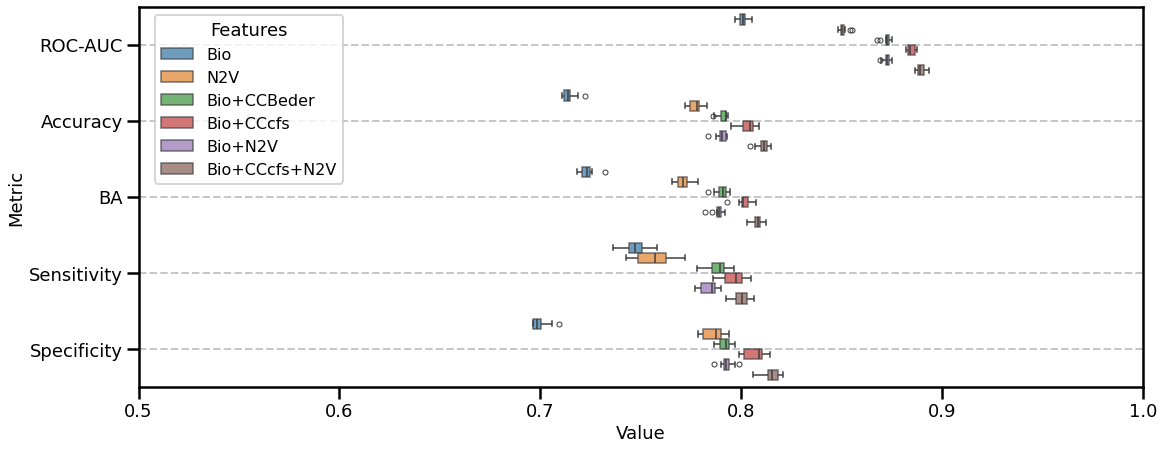

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

tissue = 'Lung'
problem = 'EvsAE'
method1 = 'HELP'
method2 = 'AdAM'
method3 = 'FiPer'
method4 = 'OGEE'

scorepath = '../scores_sv'
features = ["Bio", "N2V", "Bio+CCBeder", "Bio+CCcfs", "Bio+N2V", "Bio+CCcfs+N2V"]
suffixes = ['bio','n2v', 'bioccbeder', 'biocc', 'bion2v', 'bioccn2v']

# Upload input datasets
dfs = []
for feature,suffix in zip(features,suffixes):
    df_tmp = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv")).drop(columns=["MCC", "CM"])
    #df_tmp = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv")).drop(columns=["ROC-AUC", "Accuracy", "CM"])
    df_tmp['Feature'] = feature
    dfs += [df_tmp]

# Merge datasets and modify the dataframe for boxplot generation
Scores = pd.concat(dfs)
Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")

# Set seaborn style
sns.set_context("poster")
#sns.set(style="whitegrid", palette="pastel")

# Generate boxplots
plt.figure(figsize=(18, 7))
sns.boxplot(x="Value", y="Metric", hue="Feature", data=Scores, dodge=True,
            linewidth=1.5, fliersize=5, saturation=0.75, notch=False, boxprops=dict(alpha=0.7))

plt.xlim(0.5, 1)
#plt.title("Boxplots of Classification Metrics", fontsize=18)
plt.xlabel("Value", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Metric", fontsize=18)
plt.legend(title="Features", fontsize="16", title_fontsize="18", loc="upper center", bbox_to_anchor=(0.11, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add vertical lines between groups of metric values
unique_metrics = Scores["Metric"].unique()
for i in range(1, len(unique_metrics)):
    plt.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=1)
plt.show()


In [11]:
import pandas as pd
from tabulate import tabulate
import os
scorepath = '../scores_sv'
method1 = 'HELP'
tissue = 'Lung'
problem = 'EvsAE'
df_p = pd.DataFrame()
df_means = pd.DataFrame()
#features = ["Bio", "N2V", "Bio+BPBeder", "Bio+CCBeder", "Bio+CCcfs", "Bio+N2V", "Bio+CCcfs+N2V"]
#suffixes = ['bio','n2v', 'biobpbeder', 'bioccbeder', 'biocc', 'bion2v', 'bioccn2v']
features = ["Bio", "N2V","Bio+CCBeder", "Bio+CCcfs", "Bio+N2V", "Bio+CCcfs+N2V"]
suffixes = ['bio','n2v', 'bioccbeder', 'biocc', 'bion2v', 'bioccn2v']
for feature, suffix in zip(features,suffixes):
    print(feature, suffix)
    df = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv"))
    metrics = df.drop(columns=['CM']).columns
    means, stds = df.drop(columns=['CM']).mean(), df.drop(columns=['CM']).std()
    row_df = pd.DataFrame([[f"{means[m]:.4f}±{stds[m]:.4f}" for m in metrics]], columns=metrics, index=[feature])
    row_df.index.name = 'feature'
    row_df['CM'] = df['CM'].values[0].replace('\n', ',')
    df_means = pd.concat([df_means, pd.DataFrame([[f"{means[m]:.4f}" for m in metrics]], columns=metrics)])
    df_p = pd.concat([df_p, row_df])
df_means = df_means.set_index(pd.Index(data=features, name='feature'))

print(tabulate(df_p, headers=df_p.columns, tablefmt="latex"))
#df_means.to_csv(f"{problem}{tissue}_sv.csv")
df_p.drop(columns=['CM']).to_csv(f"../results/{problem}{tissue}_sv.csv")

Bio bio
N2V n2v
Bio+CCBeder bioccbeder
Bio+CCcfs biocc
Bio+N2V bion2v
Bio+CCcfs+N2V bioccn2v
\begin{tabular}{llllllll}
\hline
               & ROC-AUC       & Accuracy      & BA            & Sensitivity   & Specificity   & MCC           & CM                         \\
\hline
 Bio           & 0.8008±0.0023 & 0.7143±0.0035 & 0.7234±0.0038 & 0.7471±0.0067 & 0.6998±0.0045 & 0.4156±0.0071 & [[ 915  309], [ 838 1921]] \\
 N2V           & 0.8508±0.0022 & 0.7771±0.0034 & 0.7714±0.0040 & 0.7566±0.0093 & 0.7861±0.0054 & 0.5157±0.0073 & [[ 909  315], [ 568 2191]] \\
 Bio+CCBeder   & 0.8723±0.0023 & 0.7909±0.0027 & 0.7903±0.0033 & 0.7887±0.0059 & 0.7918±0.0030 & 0.5500±0.0061 & [[ 969  255], [ 569 2190]] \\
 Bio+CCcfs     & 0.8846±0.0021 & 0.8035±0.0042 & 0.8014±0.0042 & 0.7960±0.0065 & 0.8068±0.0054 & 0.5734±0.0083 & [[ 985  239], [ 525 2234]] \\
 Bio+N2V       & 0.8724±0.0020 & 0.7900±0.0029 & 0.7884±0.0029 & 0.7841±0.0044 & 0.7927±0.0035 & 0.5470±0.0057 & [[ 967  257], [ 568 2191]] \\
 Bio+CCcf